In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, silhouette_score

In [3]:
#data loading to data frame
credit_card_data = pd.read_csv(r"C:\Users\Kashish Arya\Downloads\creditcard.zip")


In [4]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail() # giving last rows visulization

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
credit_card_data.info() #  giving data informatio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#distribution of legit transaction and fraud transaction
credit_card_data['Class'].value_counts()# this is unbalance dataset hihgly unbalace
# 0 represent  normal transaction
# 1 represents fraudulent transaction

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
#separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
import pandas as pd
credit_card_data = pd.read_csv(r"C:\Users\Kashish Arya\Downloads\creditcard.zip")
legit = credit_card_data[credit_card_data.Class == 0]
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#compare the values for both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
legit_sample = legit.sample(n=492)
#concatenating two dataframes
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
198223,132388.0,1.954253,-0.448621,-0.232070,0.502871,-0.778190,-0.538858,-0.567329,-0.120510,1.126323,...,0.236441,0.922060,0.090671,0.072106,-0.197169,0.623708,-0.016524,-0.042728,29.90,0
98582,66717.0,1.109707,0.075361,0.013837,1.235638,0.295758,0.339304,0.204361,-0.040788,0.175880,...,-0.108260,-0.151420,-0.231711,-0.725462,0.789966,-0.270193,0.034806,0.020098,67.77,0
65237,51493.0,1.051754,0.089562,0.066053,0.281987,0.661325,1.479274,-0.359610,0.563645,-0.223851,...,-0.138568,-0.281619,0.203669,-1.390052,-0.083433,0.226297,0.044329,0.002392,0.99,0
6701,8343.0,-0.379021,1.171807,1.327275,0.078506,0.374246,-0.439635,0.503028,0.002670,0.616737,...,-0.378896,-0.804309,-0.054267,-0.102126,-0.160249,0.035334,0.215381,0.079521,2.69,0
36049,38376.0,1.108944,-0.260764,0.667216,0.727721,-0.900083,-0.509725,-0.300894,0.135531,0.568622,...,-0.228186,-0.698795,0.078016,0.518910,0.199944,0.278277,-0.048034,0.007646,38.66,0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,90889.534553,-0.060548,0.040124,0.176883,-0.053399,0.063532,-0.068993,0.005985,0.019865,-0.051460,...,-0.041229,0.003699,0.022285,0.005054,0.030456,0.026631,-0.010506,-0.019402,0.002102,68.770366
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
198223  132388.0  1.954253 -0.448621 -0.232070  0.502871 -0.778190 -0.538858   
98582    66717.0  1.109707  0.075361  0.013837  1.235638  0.295758  0.339304   
65237    51493.0  1.051754  0.089562  0.066053  0.281987  0.661325  1.479274   
6701      8343.0 -0.379021  1.171807  1.327275  0.078506  0.374246 -0.439635   
36049    38376.0  1.108944 -0.260764  0.667216  0.727721 -0.900083 -0.509725   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [20]:
print(Y)

198223    0
98582     0
65237     0
6701      0
36049     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [26]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Fit DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X)

# Get the labels
labels = db.labels_

# Count outliers (label == -1)
n_outliers = np.sum(labels == -1)

# Count clusters (excluding outliers)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Clusters found: {n_clusters}")
print(f"Outliers found: {n_outliers}")

Clusters found: 5
Outliers found: 52


In [27]:
# Load your dataset (replace with your actual path or DataFrame)
df = pd.read_csv(r"C:\Users\Kashish Arya\Downloads\creditcard.zip")

# Optional: reduce dimensionality if needed (e.g., using PCA)
features = df.drop(['Time', 'Class'], axis=1)  # 'Class' is the fraud label
scaled_features = StandardScaler().fit_transform(features)

# Apply DBSCAN
db = DBSCAN(eps=2.0, min_samples=5).fit(scaled_features)
labels = db.labels_

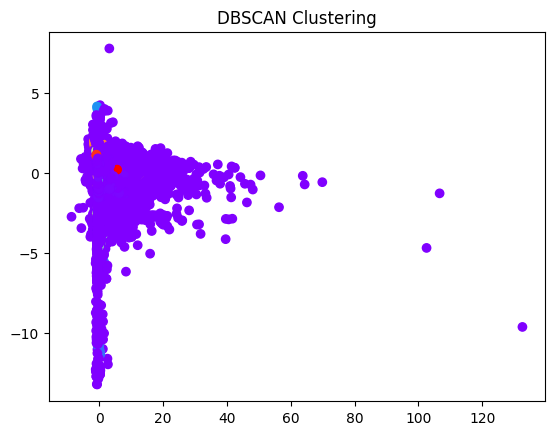

In [28]:
# Visualize clusters (if reduced to 2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

In [29]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# 3. Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

In [31]:
print("\nExplained Variance Ratio by PCA:", pca.explained_variance_ratio_)


Explained Variance Ratio by PCA: [0.70669709 0.29330291]


In [32]:
# 4. Apply DBSCAN
# Hyperparameter tuning for DBSCAN: eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on data
clusters = dbscan.fit_predict(X_pca)

In [33]:
import numpy as np
from sklearn.cluster import DBSCAN

# Sample data (replace X with your actual dataset)
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])  # Example dataset

# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(X)  # This generates the clusters array

# Identify anomalies (fraud cases)
# DBSCAN assigns -1 to outliers
anomaly_indices = np.where(clusters == -1)[0]
print("\nNumber of Anomalies Detected:", len(anomaly_indices))


Number of Anomalies Detected: 1



Detected Fraudulent Transactions:
Empty DataFrame
Columns: [Transaction_Amount, Weekly_Frequency, Cluster, Is_Fraud]
Index: []


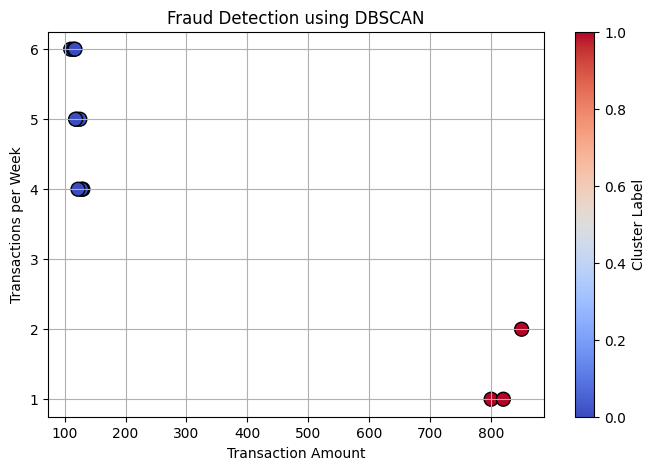

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Simulated transaction data: [Transaction Amount, Number of Transactions/Week]
data = np.array([
    [120, 5], [130, 4], [110, 6], [125, 5], [128, 4],
    [800, 1], [820, 1], [850, 2],  # Potential fraud (high amount, low frequency)
    [115, 6], [118, 5], [122, 4], [117, 6]
])

# 2. Scale data (very important for DBSCAN accuracy)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=2)
labels = dbscan.fit_predict(scaled_data)

# 4. Append results to a DataFrame
df = pd.DataFrame(data, columns=["Transaction_Amount", "Weekly_Frequency"])
df["Cluster"] = labels
df["Is_Fraud"] = df["Cluster"] == -1  # Mark noise points as frauds

# 5. Show results
print("\nDetected Fraudulent Transactions:")
print(df[df["Is_Fraud"] == True])

# 6. Visualization
plt.figure(figsize=(8, 5))
plt.scatter(df["Transaction_Amount"], df["Weekly_Frequency"], c=labels, cmap='coolwarm', s=100, edgecolors='k')
plt.xlabel("Transaction Amount")
plt.ylabel("Transactions per Week")
plt.title("Fraud Detection using DBSCAN")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()